In [ ]:
!pip install snap-stanford

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**Problem: 1.1**

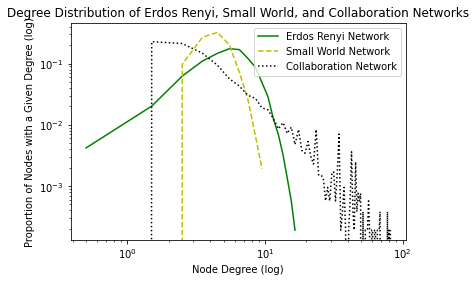

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

#1.1

n = 5242
m = 14484

def generate_erdos_renyi(n, m):
    graph = {}
    for i in range(n):
        graph[i] = set()

    max_edges = n*(n-1)//2
    if m > max_edges:
        m = max_edges

    edges = set()
    while len(edges) < m:
        u, v = random.sample(range(n), 2)
        if u == v or (u, v) in edges or (v, u) in edges:
            continue
        edges.add((u, v))

    for u, v in edges:
        graph[u].add(v)
        graph[v].add(u)

    return graph

def generate_small_world(n, k, p):
    if k % 2 != 0:
        k -= 1

    graph = {}
    for i in range(n):
        graph[i] = set()

    # create a ring lattice
    for i in range(n):
        for j in range(1, k // 2 + 1):
            v = (i + j) % n
            graph[i].add(v)
            graph[v].add(i)

    # add random edges
    for i in range(n):
        for j in range(1, k // 2 + 1):
            if random.random() < p:
                v = (i + j) % n
                w = random.randint(0, n - 1)
                graph[i].remove(v)
                graph[v].remove(i)
                graph[i].add(w)
                graph[w].add(i)

    return graph


#collabaration
#collab = snap.LoadEdgeList(snap.PUNGraph, "ca-GrQc.txt", 0, 1)

def collabr():
    graph = {}
    with open('CA-GrQc.txt', 'r') as f:
        for line in f:
            if line[0] != '#':
                u, v = map(int, line.split())
                if u != v:
                    if u not in graph:
                        graph[u] = set()
                    if v not in graph:
                        graph[v] = set()
                    graph[u].add(v)
                    graph[v].add(u)
    n_graph = len(graph)
    return graph


def degree_distribution(graph):
    degrees = [len(neighbors) for neighbors in graph.values()]
    hist, bin_edges = np.histogram(degrees, bins=range(max(degrees)+2), density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    return bin_centers, hist


erdos_renyi = generate_erdos_renyi(n, m)
small_world = generate_small_world(n, 4, 0.5)
collabar = collabr()
# plot the degree distributions
fig, ax = plt.subplots()
x_erdosRenyi, y_erdosRenyi = degree_distribution(erdos_renyi)
plt.loglog(x_erdosRenyi, y_erdosRenyi, color = 'g', label = 'Erdos Renyi Network')

x_smallWorld, y_smallWorld = degree_distribution(small_world)
plt.loglog(x_smallWorld, y_smallWorld, linestyle = 'dashed', color = 'y', label = 'Small World Network')

x_collabNet, y_collabNet = degree_distribution(collabar)
plt.loglog(x_collabNet, y_collabNet, linestyle = 'dotted', color = 'black', label = 'Collaboration Network')

plt.xlabel('Node Degree (log)')
plt.ylabel('Proportion of Nodes with a Given Degree (log)')
plt.title('Degree Distribution of Erdos Renyi, Small World, and Collaboration Networks')
plt.legend()
plt.show()

The key difference between the degree distribution of the collaboration network and the degree distributions of the random graph models is that the collaboration network has a power-law degree distribution, which means that there are many nodes with low degree and a few nodes with very high degree, while the degree distributions of the random graph models follow a Poisson distribution, which means that the nodes have more similar degrees and there are fewer nodes with very high or very low degree.

#****Problem 1.2****

##**1.2(a)**

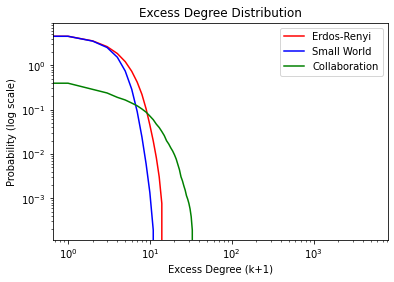

Expected degree:
Erdos-Renyi: 5.5261
Small World: 5.5261
Collaboration: 11.8569

Expected excess degree:
Erdos-Renyi: 64.760
Small World: 50.396
Collaboration: 11.857



In [ ]:
#1.2
# generate a random graph
edges = np.random.randint(0, n, size=(m, 2))

# initialize adjacency list
adj_list = [[] for _ in range(n)]

# add edges to adjacency list
for (i, j) in edges:
    adj_list[i].append(j)
    adj_list[j].append(i)

# compute degree distribution
degrees = np.array([len(adj_list[i]) for i in range(n)])
pk = degrees / n

# compute excess degree distribution
def compute_qk(degrees):
    qk = np.zeros(n)
    for k in range(n):
        qk[k] = sum(max(0, degrees[i] - k) for i in range(n)) / n
    return qk

qk = compute_qk(degrees)
exp_deg = sum(degrees) / n
exp_excess_deg = sum((k+1)*qk[k] for k in range(n))


# Load collaboration network
edges = []
with open('CA-GrQc.txt', 'r') as f:
    for line in f:
        if line.startswith('#'):
            continue
        edge = tuple(map(int, line.strip().split()))
        if edge[0] != edge[1]:
            edges.append(edge)
n = 5242
m = 14484

# Erdős-Rényi random graph
np.random.seed(1)
m_er = 14484
edges_er = set()
while len(edges_er) < m_er:
    i, j = np.random.randint(n, size=2)
    if i != j:
        edges_er.add((i, j))
edges_er = list(edges_er)
degrees_er = np.zeros(n)
for (i, j) in edges_er:
    degrees_er[i] += 1
    degrees_er[j] += 1
pk_er = degrees_er / n
qk_er = compute_qk(degrees_er)
exp_deg_er = sum(degrees_er) / n
exp_excess_deg_er = sum((k+1)*qk_er[k] for k in range(n))

# Small-world random network
edges_sw = []
for i in range(n):
    edges_sw.append((i, (i+1)%n))
    edges_sw.append((i, (i+2)%n))
np.random.seed(2)
for i in range(4000):
    while True:
        j, k = np.random.randint(n, size=2)
        if j != k and (j, k) not in edges_sw and (k, j) not in edges_sw:
            break
    edges_sw.append((j, k))
degrees_sw = np.zeros(n)
for (i, j) in edges_sw:
    degrees_sw[i] += 1
    degrees_sw[j] += 1
pk_sw = degrees_sw / n
qk_sw = compute_qk(degrees_sw)
exp_deg_sw = sum(degrees_sw) / n
exp_excess_deg_sw = sum((k+1)*qk_sw[k] for k in range(n))

# Collaboration network
degrees_collab = np.zeros(n)
for (i, j) in edges:
    if i < n and j < n:
        degrees_collab[i] += 1
        degrees_collab[j] += 1


pk_collab = degrees_collab / n
qk_collab = compute_qk(degrees_collab)
exp_degrees = [pk for pk in pk_collab]
exp_degree = sum(exp_degrees)
exp_excess_degrees = [k * qk for k, qk in enumerate(qk_collab)]
exp_deg_cb = sum((k * qk for k, qk in enumerate(qk_collab)))
exp_excess_degree = sum(exp_excess_degrees)


# Plot the excess degree distributions
plt.loglog(range(len(qk_er)), qk_er, 'r-', label='Erdos-Renyi')
plt.loglog(range(len(qk_sw)), qk_sw, 'b-', label='Small World')
plt.loglog(range(len(qk_collab)), qk_collab, 'g-', label='Collaboration')
plt.xlabel('Excess Degree (k+1)')
plt.ylabel('Probability (log scale)')
plt.title('Excess Degree Distribution')
plt.legend()
plt.show()

print("Expected degree:")
print(f"Erdos-Renyi: {exp_deg_er:.4f}")
print(f"Small World: {exp_deg_sw:.4f}")
print(f"Collaboration: {exp_deg_cb:.4f}\n")

print("Expected excess degree:")
print(f"Erdos-Renyi: {exp_excess_deg_er:.3f}")
print(f"Small World: {exp_excess_deg_sw:.3f}")
print(f"Collaboration: {exp_excess_degree:.3f}\n")


###**1.2 (b)**
To compute the excess degree distribution {qk} given only the degree distribution {pk}, we can use the following steps:



1.   Calculate the expected degree of the network: k̂ = Σk * pk
2.   For each node of degree k, calculate the expected number of edges that connect to nodes of degree k+1: (k̂ - k) * pk
1.   Sum up the expected number of edges for all nodes of degree k to get qk: Σ((k̂ - k) * pk)

Therefore, we can calculate qk for each k by using the formula qk = Σ((k̂ - k) * pk) for k ≥ 0.



# **Problem: 1.3**

In [ ]:
import numpy as np

def clustering_coefficient(node_id, graph):
    neighbors = [n for n in graph[node_id]]
    k = len(neighbors)
    if k < 2:
        return 0.0
    edges = 0
    for i in range(k):
        for j in range(i+1, k):
            if neighbors[j] in graph[neighbors[i]]:
                edges += 1
    return float(2 * edges) / (k * (k - 1))

# Load real-world collaboration network
collab_graph = {}
with open("CA-GrQc.txt") as f:
    for line in f:
        if line.startswith("#"):
            continue
        src, dst = line.strip().split()
        if src not in collab_graph:
            collab_graph[src] = []
        if dst not in collab_graph:
            collab_graph[dst] = []
        collab_graph[src].append(dst)
        collab_graph[dst].append(src)

# Compute average clustering coefficient for collaboration network
collab_coeffs = [clustering_coefficient(node_id, collab_graph) for node_id in collab_graph]
collab_avg = sum(collab_coeffs) / len(collab_graph)

# Generate Erdos-Renyi random graph
er_graph = {}
n = 5242
m = 14484
for i in range(n):
    er_graph[str(i)] = []
for i in range(m):
    src = np.random.randint(n)
    dst = np.random.randint(n)
    while dst in er_graph[str(src)] or src == dst:
        src = np.random.randint(n)
        dst = np.random.randint(n)
    er_graph[str(src)].append(str(dst))
    er_graph[str(dst)].append(str(src))

# Compute average clustering coefficient for Erdos-Renyi graph
er_coeffs = [clustering_coefficient(node_id, er_graph) for node_id in er_graph]
er_avg = sum(er_coeffs) / len(er_graph)

# Generate Small World random graph
sw_graph = {}
n = 5242
for i in range(n):
    sw_graph[str(i)] = []
# Add initial ring edges
for i in range(n):
    sw_graph[str(i)].append(str((i + 1) % n))
    sw_graph[str((i + 1) % n)].append(str(i))
    sw_graph[str(i)].append(str((i - 1) % n))
    sw_graph[str((i - 1) % n)].append(str(i))
# Add next-nearest neighbor edges
for i in range(n):
    sw_graph[str(i)].append(str((i + 2) % n))
    sw_graph[str((i + 2) % n)].append(str(i))
    sw_graph[str(i)].append(str((i - 2) % n))
    sw_graph[str((i - 2) % n)].append(str(i))
# Add random edges
for i in range(4000):
    src = np.random.randint(n)
    dst = np.random.randint(n)
    while dst in sw_graph[str(src)] or src == dst:
        src = np.random.randint(n)
        dst = np.random.randint(n)
    sw_graph[str(src)].append(str(dst))
    sw_graph[str(dst)].append(str(src))

# Compute average clustering coefficient for Small World graph
sw_coeffs = [clustering_coefficient(node_id, sw_graph) for node_id in sw_graph]
sw_avg = sum(sw_coeffs) / len(sw_graph)

print("Average clustering coefficient for each network:")
print(f"Real-world collaboration network: {collab_avg}")
print(f"Erdos-Renyi random graph: {er_avg}")
print(f"Small World random graph: {sw_avg}")
print('')
if collab_avg > er_avg and collab_avg > sw_avg:
    print("The real-world collaboration network has the largest average clustering coefficient.")
    print("In real-world networks, there is often a tendency for individuals to form groups, leading to higher clustering coefficients..")
elif er_avg > collab_avg and er_avg > sw_avg:
    print("The Erdos-Renyi random graph has the largest average clustering coefficient.")
    print("This is likely because the graph is randomly generated and does not exhibit any underlying structure.")
else:
    print("The Small World random graph has the largest average clustering coefficient.")
    print("This is likely because the graph has a high number of local connections due to its small-world structure, which increases the number of triangles compared to the Erdos-Renyi graph.")


Average clustering coefficient for each network:
Real-world collaboration network: 0.42734243451697634
Erdos-Renyi random graph: 0.001134172538216795
Small World random graph: 0.31154614388111773

The real-world collaboration network has the largest average clustering coefficient.
In real-world networks, there is often a tendency for individuals to form groups, leading to higher clustering coefficients..
